# 3. Introduction to machine learning (2 1/2 weeks)

# Session 3.5: Unsupervised learning
* NOTE: Content of this note book are taken from: https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

### 3.5.1 The k - Means clustering algorithm

* The k-means algorithm searches for a pre-determined number of clusters within an unlabeled multidimensional dataset. It accomplishes this using a simple conception of what the optimal clustering looks like. <br>

* The "cluster center" is the arithmetic mean of all the points belonging to the cluster. Each point is closer to its own cluster center than to other cluster centers. Those two assumptions are the basis of the k-means model. We will soon dive into exactly how the algorithm reaches this solution, but for now let's take a look at a simple dataset and see the k-means result. <br>

* First, let's generate a two-dimensional dataset containing four distinct blobs. To emphasize that this is an unsupervised algorithm, we will leave the labels out of the visualization.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

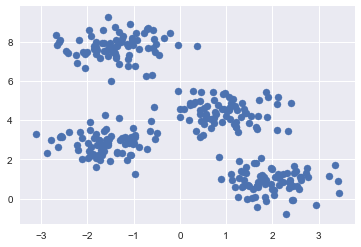

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

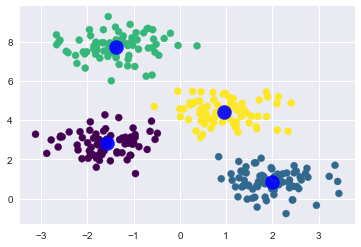

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=200, alpha=0.9);

### 3.5.2 Digit data clustering using k - Means

* To start, let's take a look at applying k-means on the same simple digits data. Here we will attempt to use k-means to try to identify similar digits without using the original label information; this might be similar to a first step in extracting meaning from a new dataset about which you don't have any a priori label information.

* We will start by loading the digits and then finding the KMeans clusters. Recall that the digits consist of 1,797 samples with 64 features, where each of the 64 features is the brightness of one pixel in an 8×8 image:

In [5]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [13]:
print digits.data[2]

[ 0.  0.  0.  4. 15. 12.  0.  0.  0.  0.  3. 16. 15. 14.  0.  0.  0.  0.
  8. 13.  8. 16.  0.  0.  0.  0.  1.  6. 15. 11.  0.  0.  0.  1.  8. 13.
 15.  1.  0.  0.  0.  9. 16. 16.  5.  0.  0.  0.  0.  3. 13. 16. 16. 11.
  5.  0.  0.  0.  0.  3. 11. 16.  9.  0.]


In [15]:
print digits.target

[0 1 2 ... 8 9 8]


In [16]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

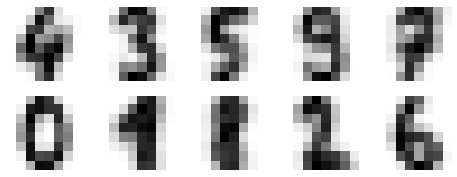

In [17]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [19]:
print center

[[ 0.00000000e+00 -1.16573418e-15  1.15934066e+00  1.12252747e+01
   9.53296703e+00  1.41758242e+00  5.49450549e-03 -3.05311332e-16]
 [-2.51534904e-17  6.04395604e-02  7.18131868e+00  1.45604396e+01
   6.19230769e+00  8.29670330e-01  2.74725275e-02  3.74700271e-16]
 [-1.25767452e-17  7.69230769e-01  1.24560440e+01  9.47252747e+00
   9.34065934e-01  1.09890110e-01  0.00000000e+00  4.16333634e-17]
 [-3.03576608e-18  2.29670330e+00  1.36208791e+01  8.09340659e+00
   3.87362637e+00  1.92857143e+00  1.04395604e-01 -6.07153217e-18]
 [ 0.00000000e+00  3.52747253e+00  1.46758242e+01  1.29175824e+01
   1.22527473e+01  1.02857143e+01  2.71978022e+00  0.00000000e+00]
 [-2.42861287e-17  1.86813187e+00  1.45164835e+01  1.06538462e+01
   5.57692308e+00  1.01923077e+01  9.13186813e+00  2.30769231e-01]
 [-2.42861287e-17  1.75824176e-01  1.02857143e+01  1.26263736e+01
   5.41758242e+00  1.13241758e+01  1.08956044e+01  6.26373626e-01]
 [-1.51788304e-18 -6.10622664e-16  1.44505495e+00  1.07362637e+01
   

* We see that even without the labels, KMeans is able to find clusters whose centers are recognizable digits, with perhaps the exception of 1 and 8. Because k-means knows nothing about the identity of the cluster, the 0–9 labels may be permuted. We can fix this by matching each learned cluster label with the true labels found in them.

### <font color='red'>Exercise 3.5</font> <br>
* For the above digit clustering algorithm, add section which calculates the confusion martic with the help of available labels in the MINST data set.